###PCA

####0. setting

In [99]:
import numpy as np
import numpy.linalg as lin
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####1. data load

In [126]:
data = np.loadtxt('/content/drive/MyDrive/ml/HR_comma_sep.csv', delimiter=',', skiprows=1, usecols=range(8))
print(data.shape)

(14999, 8)


In [127]:
#data 열6(left)를 y로 설정
X1 = data[:, :6]
X2 = data[:, 7:]
X = np.concatenate((X1, X2), axis=1)
y = data[:, 6]
print(X.shape)
print(y.shape)

(14999, 7)
(14999,)


####2. pca algorithm

In [128]:
def pca(data, k):
  #data scaling
  mean = data.mean(axis=0)
  std = data.std(axis=0)
  x_scaled = (data-mean)/std 
  feature = x_scaled.T

  #covariance matrix
  cov_matrix = np.cov(feature)

  #eigenvalue, eigenvector
  eigvalue = lin.eig(cov_matrix)[0]  
  eigvector = lin.eig(cov_matrix)[1]  
  

  #k개의 largest eigenvalue에 따른 eigenvector 
  ev = np.array(eigvalue)
  max = []
  for i in range(k):
    m = np.argmax(ev)
    max.append(m)
    ev[m] = 0
  
  res = []
  for j in range(k):
    res.append(eigvector[max[j]])

  return res

In [129]:
def transform_w_pca(data, pcs):

  for i in range(pcs.shape[0]):
    if i==0:
      res = [data.dot(pcs.T[:, i])]
    else:
      res = np.concatenate((res, [data.dot(pcs.T[:, i])]), axis=0)
  
  converted_data = res.T

  return converted_data

In [130]:
pcs = pca(X, 2)
print(pcs)

[array([ 0.08797699,  0.29189921,  0.27784886,  0.33637135,  0.79752505,
        0.26786864, -0.09438973]), array([-0.31354922, -0.05287224,  0.12200054,  0.78782241, -0.28404472,
        0.04036861,  0.42547869])]


In [131]:
pcs = np.array(pcs)
converted_data = transform_w_pca(X, pcs)
print(converted_data.shape)

(14999, 2)


####3. plot pca

In [132]:
pc1 = converted_data[:, 0]
pc2 = converted_data[:, 1]

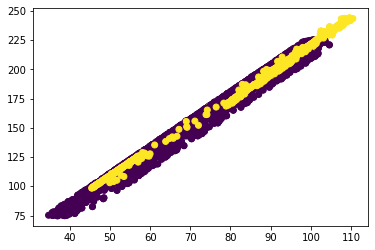

In [133]:
plt.scatter(pc1, pc2, c=y)  #y = data[:, 6]
plt.savefig('/content/drive/MyDrive/ml/pca.png')